In [416]:
import numpy as np


!apt install libgraphviz-dev
!pip install pygraphviz
import networkx as nx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [513]:
class Graph:
    def __init__(self, n_inaccesible, n_accesible, n_supporting):
        
        #self.G = G
        #self.adjacency = nx.linalg.graphmatrix.adjacency_matrix(G)

        self.n_nodes = sum([n_inaccesible, n_accesible, n_supporting]) + 1
        self.n_inaccesible = n_inaccesible
        self.n_accesible = n_accesible

        self.adjacency = np.zeros((self.n_nodes, self.n_nodes)).astype(np.int)

        # fill spammer
        self.adjacency[-n_supporting-1,-n_supporting:] = 1

        # fill accessible to spammer
        self.adjacency[-n_supporting:,-n_supporting-1] = 1

        
        self.adjacency[-n_supporting-1, n_inaccesible:n_inaccesible+n_accesible] = 1

        # make sure that the all accessible are pointed to
        # TO DO

        # make sure that there are no dead ends
        # TO DO

        # add random connections to inaccesible
        A = np.random.randint(2, size=(n_inaccesible+n_supporting,n_inaccesible))
        for i in range(0):
            B = np.random.randint(2, size=(n_inaccesible+n_supporting,n_inaccesible))
            A = A & B
        self.adjacency += np.pad(A, pad_width=[(0,self.n_nodes-A.shape[i]) for i in range(2)])

        # remove 1s along the diagonal
        self.adjacency = self.adjacency & (1-np.identity(self.n_nodes, dtype=np.int))

        #self.adjacency = self.adjacency.T

        # remove self connections
        self.__set_transition()



    def __set_transition(self):
        self.transition = self.adjacency.copy().astype(np.double)
        for i in range(self.n_nodes):
            n_nodes_in_column = sum(self.transition[:, i])
            if n_nodes_in_column != 0:
                self.transition[:, i] = self.transition[:, i] / n_nodes_in_column

    def get_updated_transition_matrix(self, beta):
        return beta * self.transition + (1-beta) * np.identity(self.n_nodes)

    def get_eigen_vector(self, beta):
        return np.linalg.eig(self.get_updated_transition_matrix(beta))

    def get_equilibrium_vector(self, beta):

        def close_to(n,t):
            return abs(n - t) < 0.001

        values, vectors = graph.get_eigen_vector(beta)
        index = np.where(close_to(values.astype(np.float), 1))
        return np.squeeze(vectors[:, index]).astype(np.double)

    def get_equilibrium(self, beta):

        vector = self.get_equilibrium_vector(beta)
        total = sum(vector)
        vector /= total
        return vector

    def get_external_contribution(self, beta):

        vector = self.get_equilibrium(beta)
        return beta * sum(vector[self.n_inaccesible: self.n_inaccesible + self.n_accesible])


In [599]:
graph = Graph(10,1,1)
equilibrium = graph.get_equilibrium(0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part


In [600]:
matrix = graph.get_updated_transition_matrix(0.8)
matrix

array([[0.2       , 0.16      , 0.2       , 0.13333333, 0.        ,
        0.        , 0.        , 0.11428571, 0.13333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.16      , 0.2       , 0.2       , 0.        , 0.        ,
        0.16      , 0.        , 0.11428571, 0.13333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.16      , 0.2       , 0.        , 0.        ,
        0.        , 0.11428571, 0.11428571, 0.13333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.16      , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.11428571, 0.11428571, 0.13333333, 0.16      ,
        0.        , 0.        , 0.        ],
       [0.16      , 0.16      , 0.        , 0.13333333, 0.2       ,
        0.        , 0.        , 0.        , 0.13333333, 0.16      ,
        0.        , 0.        , 0.        ],
       [0.        , 0.16      , 0.2       , 0.13333333, 0.        ,
        0.2       , 0.11428

In [601]:
values, vectors = np.linalg.eig(matrix)

In [602]:
values

array([ 1.        +0.00000000e+00j,  0.86733993+0.00000000e+00j,
       -0.6       +0.00000000e+00j,  0.3020352 +3.82025610e-02j,
        0.3020352 -3.82025610e-02j,  0.0291754 +1.26423405e-01j,
        0.0291754 -1.26423405e-01j, -0.02607666+0.00000000e+00j,
        0.02871958+0.00000000e+00j,  0.2       +1.02807231e-08j,
        0.2       -1.02807231e-08j,  0.13379797+1.24051320e-01j,
        0.13379797-1.24051320e-01j])

In [603]:
vectors[:, 0]

array([-1.02463020e-16+0.j,  2.50120662e-16+0.j, -8.10406661e-19+0.j,
        3.76270501e-17+0.j,  2.04781107e-16+0.j,  7.12979754e-17+0.j,
        7.10614883e-17+0.j,  2.91134179e-16+0.j,  1.62092139e-17+0.j,
        6.39556527e-17+0.j,  4.30481304e-16+0.j, -7.07106781e-01+0.j,
       -7.07106781e-01+0.j])

In [604]:
np.matmul(matrix, vectors[:, 0])

array([ 5.98152666e-17+0.j,  8.03093499e-17+0.j,  8.34122436e-17+0.j,
        4.49192502e-17+0.j,  8.19925170e-17+0.j,  1.00527550e-16+0.j,
        1.08982580e-16+0.j,  7.15946459e-17+0.j,  7.12931538e-17+0.j,
        3.94982881e-17+0.j,  2.46665316e-16+0.j, -7.07106781e-01+0.j,
       -7.07106781e-01+0.j])

In [590]:
sum(equilibrium)

1.0

In [591]:
equilibrium

array([0. , 0. , 0. , 0.5, 0.5])

In [592]:
graph.get_external_contribution(0.8)

0.0

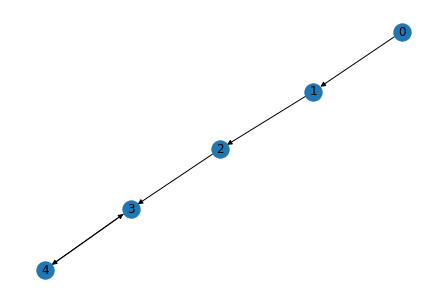

In [593]:
G = nx.convert_matrix.from_numpy_matrix(graph.adjacency.T, create_using=nx.DiGraph)
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos, with_labels=True)

In [563]:
for i in range(24):
    print(len(G[i]))

14
12
14
10
17
11
13
13
13
19
15
10
13
9
15
19
11
14
14
12
1
1
1
1


In [543]:
graph.transition

array([[0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

In [544]:
np.matmul(graph.get_updated_transition_matrix(0.8),equilibrium)

array([0. , 0. , 0. , 0.5, 0.5])

In [548]:
vectors[:, 0]

array([0.        , 0.        , 0.        , 0.70710678, 0.70710678])